Importação das Bibiliotecas e Datasets

In [37]:
import pandas as pd
from google.colab import files

# Carrega todos os arquivos CSV enviados
uploaded = files.upload()

# Inicializa uma lista para armazenar os DataFrames
datasets = []

# Lê os arquivos CSV e adiciona os DataFrames à lista
for filename in uploaded.keys():
    dataset = pd.read_csv(filename)
    datasets.append(dataset)

# Concatena todos os DataFrames em um único DataFrame
full_df = pd.concat(datasets, ignore_index=True)

# Salva o DataFrame combinado em um arquivo CSV
full_df.to_csv('output.csv', index=False)

Saving crimes_violentos_2014.csv to crimes_violentos_2014 (2).csv
Saving crimes_violentos_2015.csv to crimes_violentos_2015 (2).csv
Saving crimes_violentos_2016.csv to crimes_violentos_2016 (2).csv
Saving crimes_violentos_2017.csv to crimes_violentos_2017 (2).csv
Saving crimes_violentos_2018.csv to crimes_violentos_2018 (2).csv
Saving crimes_violentos_2019.csv to crimes_violentos_2019 (2).csv
Saving crimes_violentos_2020.csv to crimes_violentos_2020 (2).csv
Saving crimes_violentos_2021.csv to crimes_violentos_2021 (2).csv
Saving crimes_violentos_2022.csv to crimes_violentos_2022 (2).csv
Saving crimes_violentos_2023.csv to crimes_violentos_2023 (2).csv
Saving crimes_violentos_2024.csv to crimes_violentos_2024 (2).csv


Informações Estatísticas

In [38]:
full_df.describe()
print(full_df.head())

   registros           natureza            municipio  cod_municipio  mes  \
0          0  Estupro Consumado  ABADIA DOS DOURADOS         310010    1   
1          0  Estupro Consumado               ABAETE         310020    1   
2          0  Estupro Consumado           ABRE-CAMPO         310030    1   
3          0  Estupro Consumado              ACAIACA         310040    1   
4          0  Estupro Consumado              ACUCENA         310050    1   

    ano  risp rmbh  
0  2014    10  NÃO  
1  2014     7  NÃO  
2  2014    12  NÃO  
3  2014    12  NÃO  
4  2014    12  NÃO  


Crimes que mais ocorreram

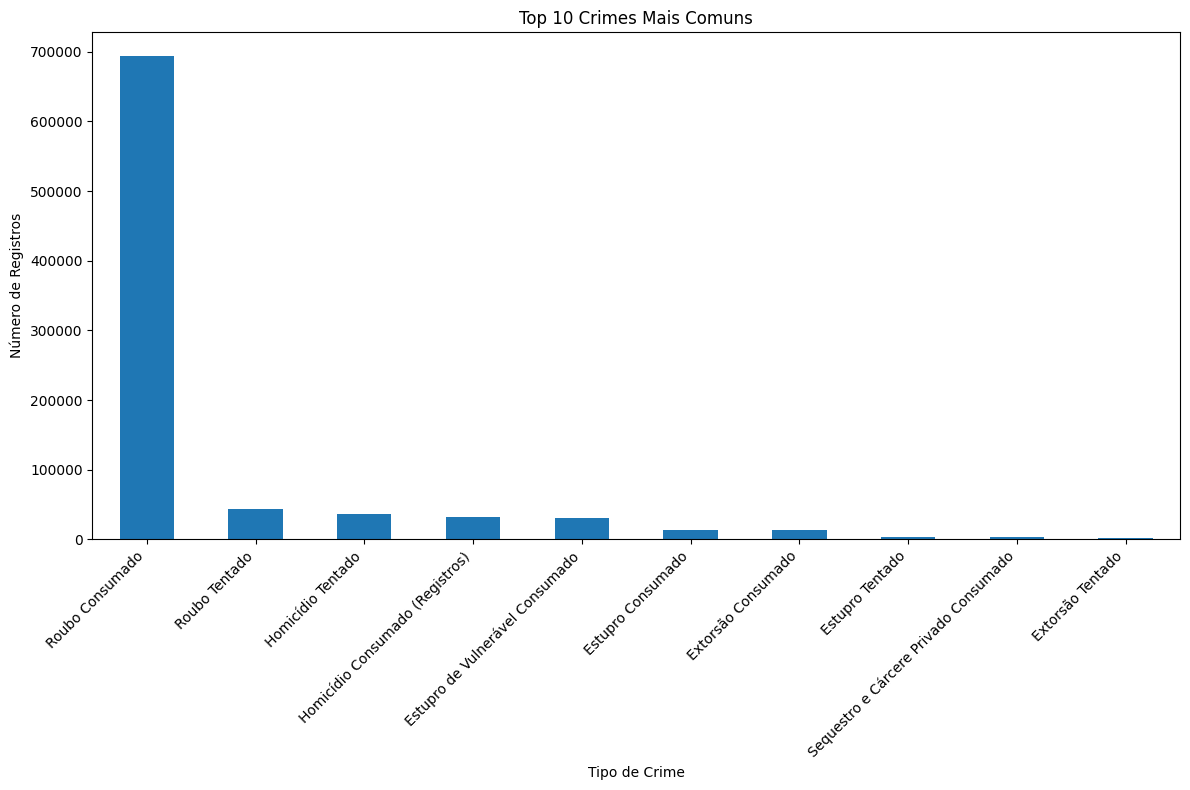

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

# Calcular a soma dos registros para cada natureza (tipo de crime)
crime_counts = full_df.groupby('natureza')['registros'].sum()

# Selecionar as naturezas que tiveram o maior número de registros
top_crimes = crime_counts.nlargest(10)

# Plotar um gráfico de barras com as naturezas que tiveram mais registros
plt.figure(figsize=(12, 8))
top_crimes.plot(kind='bar')
plt.title('Top 10 Crimes Mais Comuns')
plt.xlabel('Tipo de Crime')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Municípios com maior ocorrência de crimes

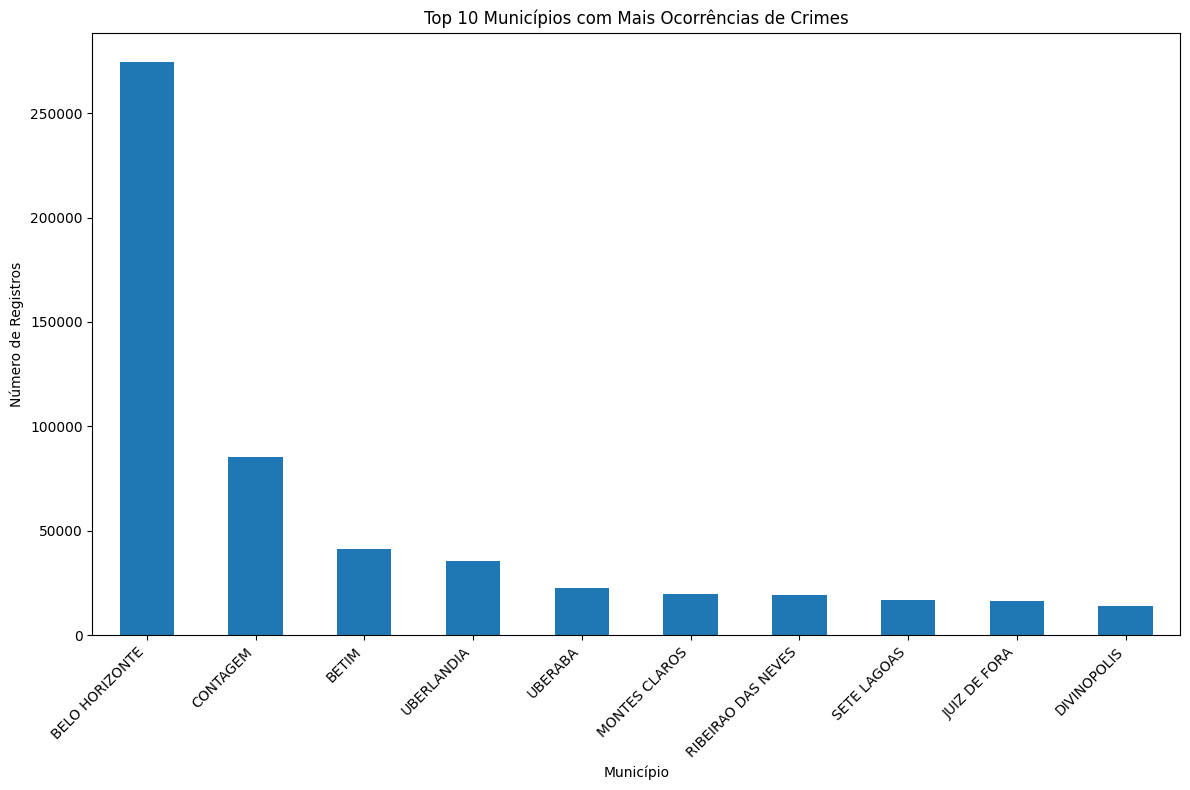

In [41]:
# Calcular a soma dos registros para cada município
municipio_counts = full_df.groupby('municipio')['registros'].sum()

# Selecionar os municípios que tiveram o maior número de registros
top_municipios = municipio_counts.nlargest(10)

# Plotar um gráfico de barras com os municípios que tiveram mais registros
plt.figure(figsize=(12, 8))
top_municipios.plot(kind='bar')
plt.title('Top 10 Municípios com Mais Ocorrências de Crimes')
plt.xlabel('Município')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Municípios com maiores números de ocorrências de Estupro Consumado e Estupro de Vulnerável Consumado

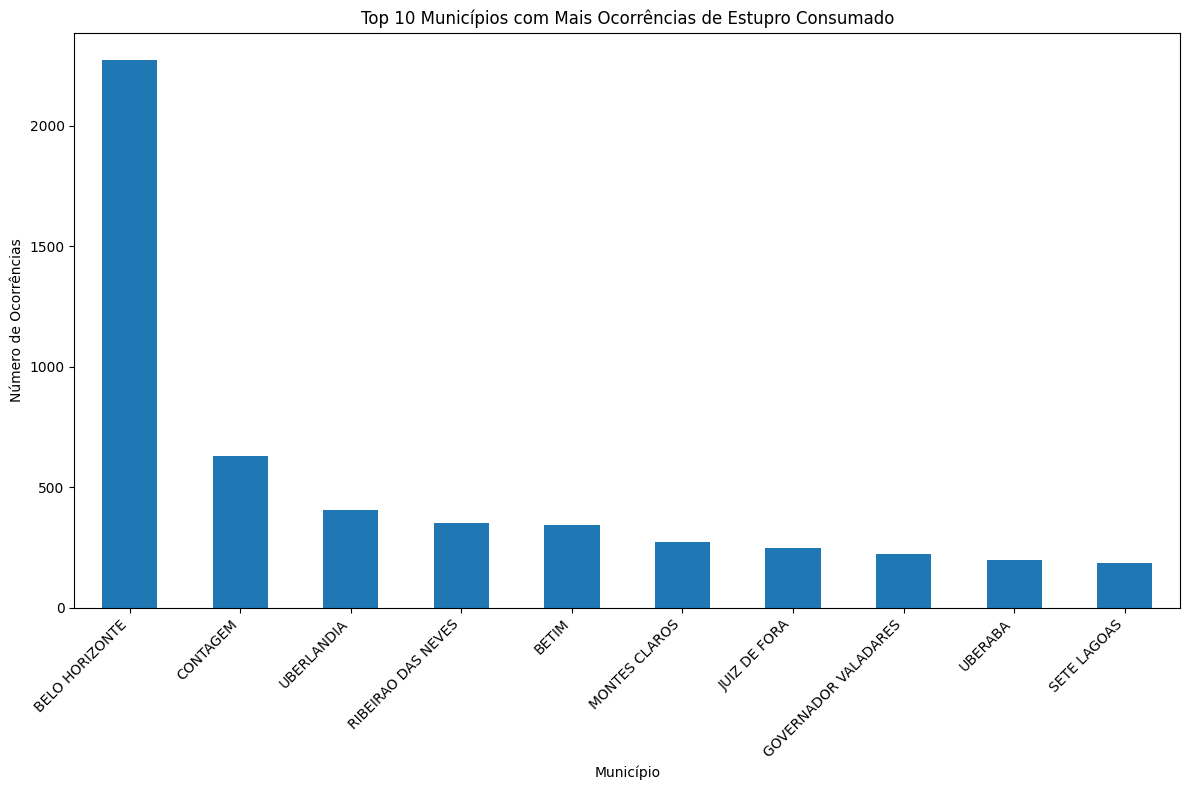

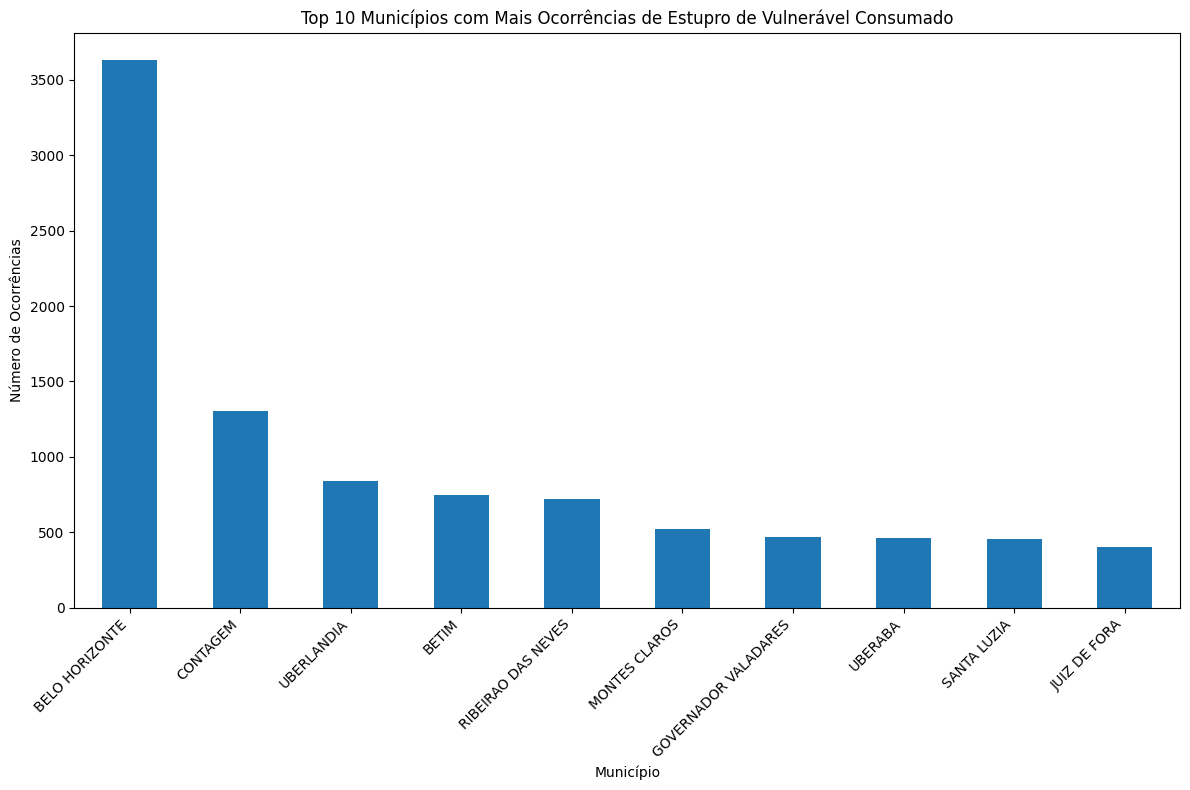

In [42]:
# Filtrar o DataFrame para incluir apenas as ocorrências de 'Estupro Consumado'
estupro_consumado_df = full_df[full_df['natureza'] == 'Estupro Consumado']

# Calcular o número total de ocorrências de 'Estupro Consumado' para cada município
estupro_consumado_counts = estupro_consumado_df.groupby('municipio')['registros'].sum()

# Selecionar os municípios que tiveram o maior número de ocorrências de 'Estupro Consumado'
top_municipios_estupro_consumado = estupro_consumado_counts.nlargest(10)

# Plotar um gráfico de barras com os municípios que tiveram as maiores ocorrências de 'Estupro Consumado'
plt.figure(figsize=(12, 8))
top_municipios_estupro_consumado.plot(kind='bar')
plt.title('Top 10 Municípios com Mais Ocorrências de Estupro Consumado')
plt.xlabel('Município')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filtrar o DataFrame para incluir apenas as ocorrências de 'Estupro de Vulnerável Consumado'
estupro_vulneravel_df = full_df[full_df['natureza'] == 'Estupro de Vulnerável Consumado']

# Calcular o número total de ocorrências de 'Estupro de Vulnerável Consumado' para cada município
estupro_vulneravel_counts = estupro_vulneravel_df.groupby('municipio')['registros'].sum()

# Selecionar os municípios que tiveram o maior número de ocorrências de 'Estupro de Vulnerável Consumado'
top_municipios_estupro_vulneravel = estupro_vulneravel_counts.nlargest(10)

# Plotar um gráfico de barras com os municípios que tiveram as maiores ocorrências de 'Estupro de Vulnerável Consumado'
plt.figure(figsize=(12, 8))
top_municipios_estupro_vulneravel.plot(kind='bar')
plt.title('Top 10 Municípios com Mais Ocorrências de Estupro de Vulnerável Consumado')
plt.xlabel('Município')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Violinplot com as ocorrências ao longo dos anos

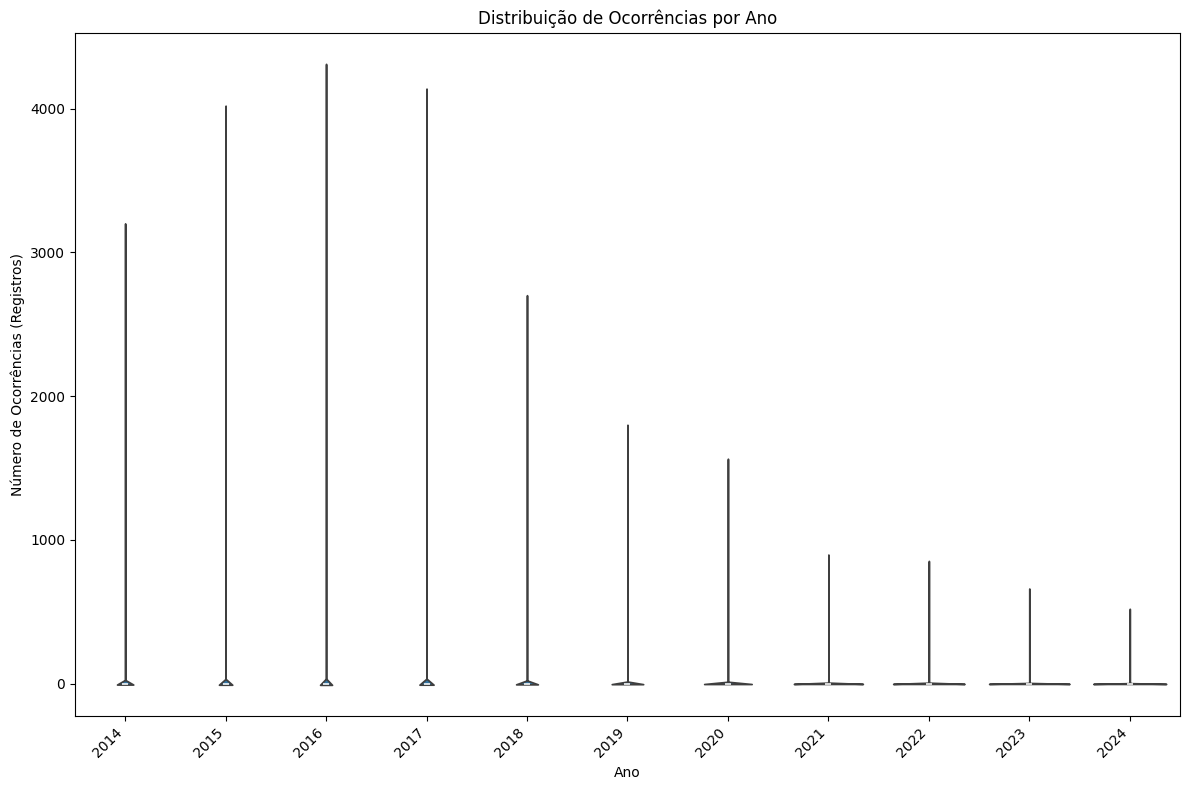

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='ano', y='registros', data=full_df)
plt.title('Distribuição de Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências (Registros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Carregando Dataset com as Populações dos Municípios

In [44]:
uploaded = files.upload()

# Lê os arquivos CSV e adiciona os DataFrames à lista
for filename in uploaded.keys():
    segundodataset = pd.read_csv(filename)
    print(f"Arquivo {filename} carregado com sucesso!")

Saving municipios.csv to municipios.csv
Arquivo municipios.csv carregado com sucesso!


Previsões para o tamanho do efetivo policial necessário para cobrir 25% da população:
[28557.43643941 28530.00165287 28552.74618316 28557.11518898
 28554.86643599 28549.0196782  28560.39194335 28556.92243872
 28545.80717392 28553.26018385 28537.19766245 28562.76919651
 28563.2831972  28562.51219617 28538.86816468 28338.08664723
 28559.68519241 28519.40038874 28547.54192623 28543.10867032
 28555.83018727 28562.19094574 28557.82193992 28560.45619343
 28561.9339454  28555.50893684 28560.19919309 28560.5846936
 28517.98688686 28560.26344318 28552.42493273 28559.29969189
 28544.84342264 28563.34744728 28561.4841948  28563.47594745
 28488.30334732 28399.63822922 28562.51219617 28554.22393513
 28553.32443393 28562.31944591 28535.6556604  28437.1602792
 28558.46444078 28542.98017015 28553.83843462 28562.25519583
 28561.22719446 28543.04442024 28551.13993102 28550.56168025
 28558.78569121 28557.11518898 28550.24042982 28545.80717392
 28561.09869429 28561.35569463 28534.37065868 28561.0344442
 2

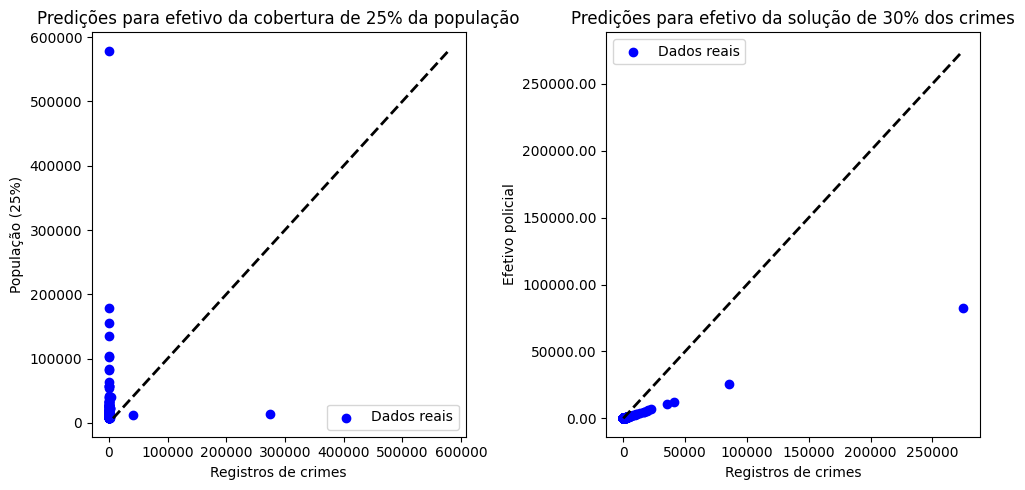

In [83]:
from sklearn.linear_model import LinearRegression

# Calcular o total de registros de crimes para cada município no full_df
total_registros_por_municipio = full_df.groupby('municipio')['registros'].sum().reset_index()

# Calcular o número mínimo de efetivo policial para cobrir 25% da população
populacao_25_porcento = segundodataset['População'] * 0.25

# Dividir os dados em features (X) e target (y)
X_registros = total_registros_por_municipio[['registros']]
y_populacao = populacao_25_porcento
X_registros_filtered = X_registros[X_registros.index.isin(y_populacao.index)]

# Inicializar e treinar o modelo de Regressão Linear para prever o número mínimo de efetivo policial para cobrir 25% da população
model_populacao = LinearRegression()
model_populacao.fit(X_registros_filtered, y_populacao)

# Fazer previsões para o tamanho do efetivo policial necessário
efetivo_predito_populacao = model_populacao.predict(X_registros)

# Calcular a proporção de crimes solucionados (30% dos registros)
proporcao_crimes_solucionados = total_registros_por_municipio['registros'] * 0.30

# Dividir os dados em features (X) e target (y)
X_crimes = total_registros_por_municipio[['registros']]
y_efetivo = proporcao_crimes_solucionados

# Inicializar e treinar o modelo de Regressão Linear para prever o efetivo policial necessário para solucionar 30% dos crimes
model_efetivo = LinearRegression()
model_efetivo.fit(X_crimes, y_efetivo)

# Fazer previsões para o tamanho do efetivo policial necessário
efetivo_predito_crimes = model_efetivo.predict(X_crimes)

# Exibir as primeiras previsões
print("Previsões para o tamanho do efetivo policial necessário para cobrir 25% da população:")
print(efetivo_predito_populacao)

print("\nPrevisões para o tamanho do efetivo policial necessário para solucionar 30% dos crimes:")
print(efetivo_predito_crimes)

# Definir o tamanho do gráfico
plt.figure(figsize=(10, 5))

# Plotar as predições para o tamanho do efetivo policial necessário para cobrir 25% da população
plt.subplot(1, 2, 1)
plt.scatter(X_registros_filtered, y_populacao, color='blue', label='Dados reais')
plt.plot([y_populacao.min(), y_populacao.max()], [y_populacao.min(), y_populacao.max()], 'k--', lw=2)
plt.title('Predições para efetivo da cobertura de 25% da população')
plt.xlabel('Registros de crimes')
plt.ylabel('População (25%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_crimes, y_efetivo, color='blue', label='Dados reais')
plt.plot([X_crimes.min(), X_crimes.max()], [X_crimes.min(), X_crimes.max()], 'k--', lw=2)
plt.title('Predições para efetivo da solução de 30% dos crimes')
plt.xlabel('Registros de crimes')
plt.ylabel('Efetivo policial')
plt.legend()

# Formatar os números para duas casas decimais nos eixos y
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Exibir o gráfico
plt.tight_layout()
plt.show()
